In [ ]:
import numpy as np
import pandas as pd
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("drive/My Drive/DeepLearning/Hw01/Heart_Disease_Dataset.csv")
df = pd.read_csv("Heart_Disease_Dataset.csv")

Mounted at /content/drive


#**First Section**

In [ ]:
print('shape = '+ str(df.shape))

shape = (1190, 12)


<div dir=rtl>
بر اساس محاسابات داریم که 1190 نمونه که هر کدام 11 ویژگی دارند را در اختیار داریم.

In [ ]:
for i in df.columns:
  print('column ' + i + ' has missing value : ' + str(df[i].isnull().values.any()))
# df['resting ecg'].unique()
# df[df['fasting blood sugar'].isnull()]

column age has missing value : False
column sex has missing value : False
column chest pain type has missing value : False
column resting bp s has missing value : False
column cholesterol has missing value : False
column fasting blood sugar has missing value : False
column resting ecg has missing value : False
column max heart rate has missing value : False
column exercise angina has missing value : False
column oldpeak has missing value : False
column ST slope has missing value : False
column target has missing value : False


<div dir=rtl>
در این جا بررسی می‌کنیم که آیا در هر ستون داده، دیتا حذف‌شده یا
NaN
وجود دارد یا خیر

In [ ]:
(df['target'].sum()/len(df['target']))*100

52.85714285714286

<div dir=rtl>
در اینجا درصد کلاس‌های یک را بدست آوردیم که نزدیک 50% می‌باشد و نشان می‌دهد داده‌ها تا حد زیادی بالانس است.


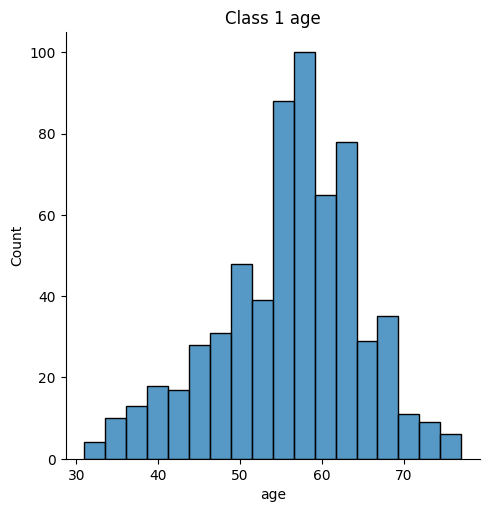

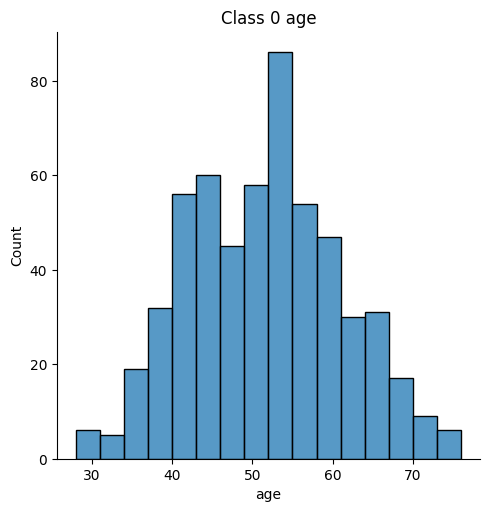

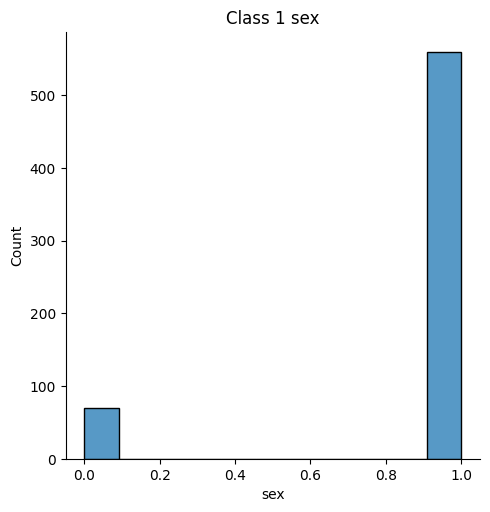

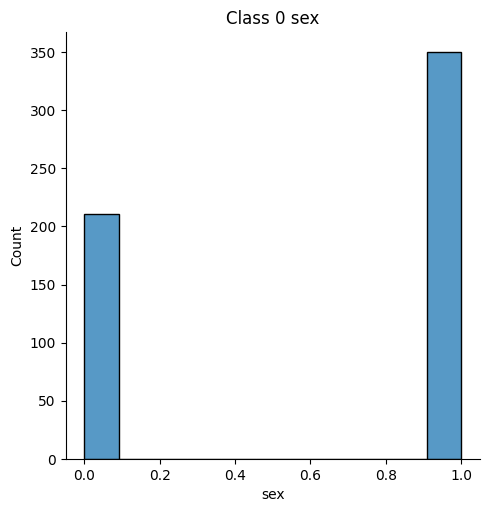

In [ ]:
import seaborn as sns

a = df.index[df['target'] == 1].tolist()
sns.displot(df['age'][a]).set(title='Class 1 age')
a = df.index[df['target'] == 0].tolist()
sns.displot(df['age'][a]).set(title='Class 0 age')
a = df.index[df['target'] == 1].tolist()
sns.displot(df['sex'][a]).set(title='Class 1 sex')
a = df.index[df['target'] == 0].tolist()
sns.displot(df['sex'][a]).set(title='Class 0 sex')

#**Second Section**

In [ ]:
from scipy.stats import zscore
def find_outliers(col):
  z = np.abs(zscore(col))
  # idx = np.where(z>3,True,False)
  idx = np.array(np.where(z>3)).tolist()
  return idx
for i in df.columns:
  idx_o = find_outliers(df[i])
  print('array of outliers in ' +i +' column:' + str(idx_o))
new_df = df[(np.abs(zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
shape = new_df.shape
print("shape of new dataset is: " , shape)



array of outliers in age column:[[]]
array of outliers in sex column:[[]]
array of outliers in chest pain type column:[[]]
array of outliers in resting bp s column:[[109, 242, 366, 400, 450, 593, 734, 761, 1013, 1075]]
array of outliers in cholesterol column:[[30, 76, 149, 618, 1039]]
array of outliers in fasting blood sugar column:[[]]
array of outliers in resting ecg column:[[]]
array of outliers in max heart rate column:[[371, 391]]
array of outliers in exercise angina column:[[]]
array of outliers in oldpeak column:[[167, 325, 704, 773, 793, 852, 978, 1010, 1070, 1078, 1172]]
array of outliers in ST slope column:[[]]
array of outliers in target column:[[]]
shape of new dataset is:  (1162, 12)


<div dir=rtl>
می‌بینیم که طول داده‌ها بعد از حذف
outliers
به عدد 1162 رسیده است.


#**Third Section**

In [ ]:
# normalized_df=(df-df.mean())/df.std()
# normalized_df = new_df.apply(lambda x: x/x.max(), axis=0) ###### normalized by max dividing
normalized_df = (new_df-new_df.min())/(new_df.max()-new_df.min()) ###### normalized by min-max
# normalized_df

<div dir=rtl>
روش‌های مختلفی برای نرمالایز کردن وجود داشت که ما از
min-max
استفاده کردیم.

#**Fourth Section**

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(normalized_df, test_size=0.3)

# Getting features
X_train = train.to_numpy()[: , :-1]
y_train = train.to_numpy()[: , -1]

# Getting labels
X_test = test.to_numpy()[: , :-1]
y_test = test.to_numpy()[: , -1]

print("Train Dataset: ", X_train.shape ,y_train.shape)
print("Test Dataset: " ,X_test.shape ,y_test.shape)

Train Dataset:  (813, 11) (813,)
Test Dataset:  (349, 11) (349,)


In [ ]:
def SVM_result(label_true, label_predicted):

    accuracy = np.sum((label_true == label_predicted)) / len(label_predicted)
    precision = np.sum(((label_predicted == label_true) & (label_true == 1))) / np.sum((label_predicted == 1))
    recall = np.sum(((label_predicted == label_true) & (label_true == 1))) / np.sum((label_true == 1))
    f1score = 2 * np.sum(((label_predicted == label_true) & (label_true == 1))) / (np.sum(label_true == 1) + np.sum(label_predicted == 1))

    return accuracy, precision, recall, f1score

In [ ]:
from sklearn.svm import SVC

###### Linear Kernel ######
clf = SVC(kernel='linear', C=50)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print("SVM Linear Result:", SVM_result(y_test, y_predicted))


###### Polynomial Kernel ######
clf = SVC(kernel='poly', C=500)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(str(i+1),"SVM Polynomial Result:", SVM_result(y_test, y_predicted))


###### RBF Kernel ######
clf = SVC(kernel='rbf',gamma =10 ,C=50)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print("SVM RBF Result:", SVM_result(y_test, y_predicted))





SVM Linear Result: (0.8022922636103151, 0.8156424581005587, 0.8021978021978022, 0.8088642659279779)
982 SVM Polynomial Result: (0.8595988538681948, 0.8715083798882681, 0.8571428571428571, 0.8642659279778393)
SVM RBF Result: (0.9197707736389685, 0.9010416666666666, 0.9505494505494505, 0.9251336898395722)


<div dir=rtl>

در بالا آرایه‌ها به ترتیب از چپ به راست

accuracy
precision
recall
f1score

هستند